<a href="https://colab.research.google.com/github/Robprogram2002/DS_and_Algo_python/blob/main/ODE_NumericalMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerias necesarias
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Definimos la ecuación diferencial
dy = lambda x,y: math.sin(x)**2*y
# Definimos la solución analitica
f = lambda x: 2*math.exp(0.5*(x-math.sin(x)*math.cos(x)))

In [3]:
# Inicialización de las variables
x_i = 0; x_f = 5; h=0.5
n = int((x_f - x_i) / h)
x_0 = 0; y_0 = 2

In [4]:
n

10

In [5]:
Xn = []; y_real = []
for i in range(n+1):
  Xn.append(x_0 + i*h)
  y_real.append(f(x_0 + i*h))

In [6]:
def error_table(results):
  abs_err = []; rel_err = []
  for i in range(len(results)):
      val = abs(results[i]-y_real[i])
      abs_err.append(val)
      rel_err.append(val/y_real[i])

  result = {
      "Xn": Xn,
      "Val. Approximado": results,
      "Val. Real": y_real,
      "Abs. Error": abs_err,
      "% Rel. Error": rel_err
  }
  df = pd.DataFrame(result).set_index("Xn")
  plt.plot(Xn, results, "ro", Xn, y_real)
  plt.legend(["Approximation", "Analytical"])
  plt.title("Aproximación por Método de Euler , h=0.5")
  plt.xlabel("x"); plt.ylabel("y")
  return df

In [7]:
def euler_method(x,y, xf, h):
  y_app = []
  for k in range(n+1):
    #añadimos el valor aproximado a la lista
    y_app.append(y)
    # calculamos la siguiente aproximación
    y = y + dy(x,y)*h
    # avanzamos al siguiente paso
    x = x + h
  return y_app

,Val. Approximado,Val. Real,Abs. Error,% Rel. Error
Xn,,,,
0.0,2.000000,2.000000,0.000000,0.000000
0.5,2.000000,2.080856,0.080856,0.038857
1.0,2.229849,2.626948,0.397099,0.151164
1.5,3.019297,4.087229,1.067932,0.261285
2.0,4.521392,6.568909,2.047517,0.311698
2.5,6.390585,8.871805,2.481220,0.279675
3.0,7.535039,9.611892,2.076853,0.216071
3.5,7.610069,9.765937,2.155869,0.220754
4.0,8.078274,11.539866,3.461592,0.299968


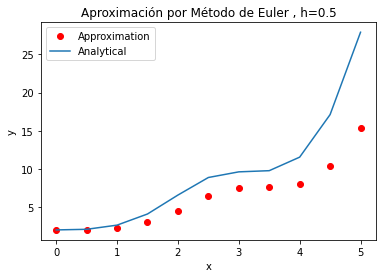

In [8]:
result_euler = euler_method(x_0, y_0, x_f, h)
error_table(result_euler)

In [9]:
def euler_improved(x,y,xf, h):
    # print("%f \t %f"% (x, y))
    y_appr = []
    for k in range(n+1):
      y_appr.append(y)
      # Aplicamos el metodo de Euler para obtener y al final del intervalo
      dy1 = dy(x,y)
      y1 = y + dy1*h
      # Utilizamos el valor de y anterior para obtener el valor de la derivada 
      # al final del intervalo
      dy2 = dy(x+h, y1)
      # calculamos el valor "ajustado" de y al final del intervalo
      y = y + (dy1 + dy2)/2 * h
      # avanzamos al siguiente paso
      x = x + h
      # print("%f \t %f"% (x,y)) 
    return y_appr

,Val. Approximado,Val. Real,Abs. Error,% Rel. Error
Xn,,,,
0.0,2.000000,2.000000,0.000000,0.000000
0.5,2.114924,2.080856,0.034068,0.016372
1.0,2.653859,2.626948,0.026910,0.010244
1.5,4.017501,4.087229,0.069728,0.017060
2.0,6.260431,6.568909,0.308478,0.046960
2.5,8.346817,8.871805,0.524988,0.059175
3.0,9.143208,9.611892,0.468684,0.048761
3.5,9.472795,9.765937,0.293142,0.030017
4.0,11.204036,11.539866,0.335830,0.029102


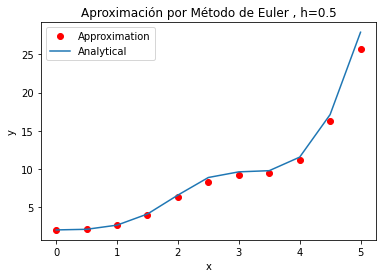

In [10]:
result_heun = euler_improved(x_0, y_0,x_f, h)
error_table(result_heun)

In [12]:
def midpoint_method(x,y,xf, h):
    # print("%f \t %f"% (x, y))
    y_appr = []
    for k in range(n+1):
      y_appr.append(y)
      # Aplicamos el metodo de Euler para obtener y en el punto medio del intervalo
      dy1 = dy(x,y)
      ym = y + dy1*h/2
      # Utilizamos el valor de y anterior para obtener el valor de la derivada 
      # en el punto medio del intervalo 
      dym = dy(x+h/2, ym)
      # calculamos el valor de y al final del intervalo
      y = y + dym* h
      # avanzamos al siguiente paso
      x = x + h
      # print("%f \t %f"% (x,y)) 
    return y_appr

,Val. Approximado,Val. Real,Abs. Error,% Rel. Error
Xn,,,,
0.0,2.000000,2.000000,0.000000,0.000000
0.5,2.061209,2.080856,0.019647,0.009442
1.0,2.567576,2.626948,0.059373,0.022601
1.5,3.928377,4.087229,0.158851,0.038865
2.0,6.303227,6.568909,0.265682,0.040445
2.5,8.605598,8.871805,0.266207,0.030006
3.0,9.288487,9.611892,0.323404,0.033646
3.5,9.343125,9.765937,0.422813,0.043295
4.0,10.916188,11.539866,0.623677,0.054045


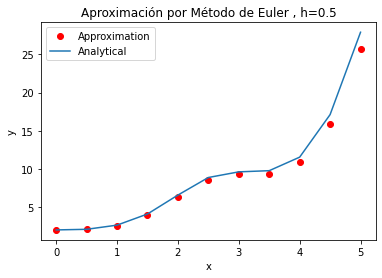

In [13]:
result_midpoint = midpoint_method(x_0, y_0, x_f, h)
error_table(result_midpoint)

In [15]:
def ralston_method(x,y,xf, h):
    # print("%f \t %f"% (x, y))
    y_appr = []
    for k in range(n+1):
      y_appr.append(y)
      # Aplicamos el metodo de Euler para obtener y en el punto 3/4
      dy1 = dy(x,y)
      y34 = y + dy1*(3*h/4)
      # Utilizamos el valor de y anterior para obtener el valor de la derivada 
      # en el punto medio del intervalo 
      dy34 = dy(x+(3*h/4), y34)
      # calculamos el valor de y al final del intervalo
      y = y + (1/3 * dy1 + 2/3 * dy34)* h
      # avanzamos al siguiente paso
      x = x + h
      # print("%f \t %f"% (x,y)) 
    return y_appr

,Val. Approximado,Val. Real,Abs. Error,% Rel. Error
Xn,,,,
0.0,2.000000,2.000000,0.000000,0.000000
0.5,2.089437,2.080856,0.008581,0.004124
1.0,2.615157,2.626948,0.011791,0.004488
1.5,3.985208,4.087229,0.102020,0.024961
2.0,6.306492,6.568909,0.262417,0.039948
2.5,8.500751,8.871805,0.371054,0.041824
3.0,9.231277,9.611892,0.380614,0.039598
3.5,9.427761,9.765937,0.338176,0.034628
4.0,11.094289,11.539866,0.445577,0.038612


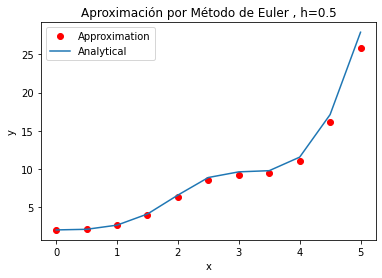

In [16]:
result_ralston = ralston_method(x_0, y_0, x_f, h)
error_table(result_ralston)

In [20]:
def RK3(x,y,xf,h):
  # print("%f \t %f"% (x, y))
  y_appr = []
  for k in range(n+1):
    y_appr.append(y)
    # Calculamos los valores aproximados de las derivadas 
    k1 = dy(x,y)
    k2 = dy(x+h/2, y + k1*h/2)
    k3 = dy(x + h/2, y - k1*h + 2*k2*h)
    # Calculamos el valor estimado para y
    y = y + 1/6 * (k1 + 4*k2 + k3) * h
    # avanzamos al siguiente paso
    x = x + h
    # print("%f \t %f"% (x,y)) 
  return y_appr

,Val. Approximado,Val. Real,Abs. Error,% Rel. Error
Xn,,,,
0.0,2.000000,2.000000,0.000000,0.000000
0.5,2.051632,2.080856,0.029224,0.014044
1.0,2.536277,2.626948,0.090671,0.034516
1.5,3.906789,4.087229,0.180440,0.044147
2.0,6.344784,6.568909,0.224125,0.034119
2.5,8.748588,8.871805,0.123217,0.013889
3.0,9.576568,9.611892,0.035324,0.003675
3.5,9.639375,9.765937,0.126563,0.012960
4.0,11.154816,11.539866,0.385050,0.033367


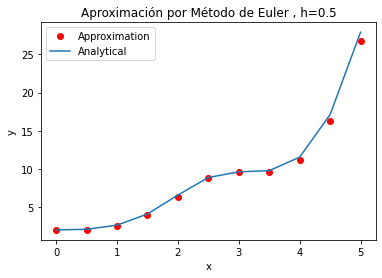

In [21]:
result_RK3 = RK3(x_0, y_0, x_f, h)
error_table(result_RK3)

In [17]:
def RK4(x,y,xf,h):
  # print("%f \t %f"% (x, y))
  y_appr = []
  for k in range(n+1):
    y_appr.append(y)
    # Calculamos los valores aproximados de las derivadas 
    k1 = dy(x,y)
    k2 = dy(x + h/2, y + k1*h/2)
    k3 = dy(x + h/2, y + k2*h/2)
    k4 = dy(x + h, y + k3*h)
    # Calculamos el valor estimado para y
    y = y + 1/6 * (k1 + 2*k2 + 2*k3 + k4) * h
    # avanzamos al siguiente paso
    x = x + h
    # print("%f \t %f"% (x,y)) 
  return y_appr

,Val. Approximado,Val. Real,Abs. Error,% Rel. Error
Xn,,,,
0.0,2.000000,2.000000,0.000000,0.000000
0.5,2.080616,2.080856,0.000240,0.000115
1.0,2.626551,2.626948,0.000397,0.000151
1.5,4.086093,4.087229,0.001135,0.000278
2.0,6.566018,6.568909,0.002891,0.000440
2.5,8.867524,8.871805,0.004281,0.000483
3.0,9.606408,9.611892,0.005483,0.000570
3.5,9.759067,9.765937,0.006870,0.000703
4.0,11.531199,11.539866,0.008667,0.000751


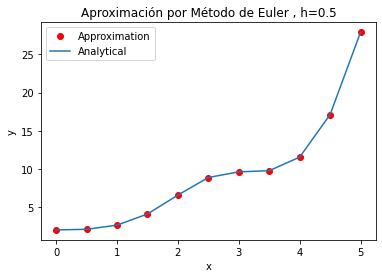

In [18]:
result_RK4 = RK4(x_0, y_0, x_f, h)
error_table(result_RK4)

In [22]:
# Comparación de todos los metodos númericos 
data = {
    "Xn": Xn,
    "Euler": result_euler,
    "Heun": result_heun,
    "Mid-Point": result_midpoint,
    "Ralston": result_ralston,
    "RK3": result_RK3,
    "RK4": result_RK4,
    "Val. Real": y_real
}

data = pd.DataFrame(data).set_index("Xn")
data

,Euler,Heun,Mid-Point,Ralston,RK3,RK4,Val. Real
Xn,,,,,,,
0.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
0.5,2.000000,2.114924,2.061209,2.089437,2.051632,2.080616,2.080856
1.0,2.229849,2.653859,2.567576,2.615157,2.536277,2.626551,2.626948
1.5,3.019297,4.017501,3.928377,3.985208,3.906789,4.086093,4.087229
2.0,4.521392,6.260431,6.303227,6.306492,6.344784,6.566018,6.568909
2.5,6.390585,8.346817,8.605598,8.500751,8.748588,8.867524,8.871805
3.0,7.535039,9.143208,9.288487,9.231277,9.576568,9.606408,9.611892
3.5,7.610069,9.472795,9.343125,9.427761,9.639375,9.759067,9.765937
4.0,8.078274,11.204036,10.916188,11.094289,11.154816,11.531199,11.539866


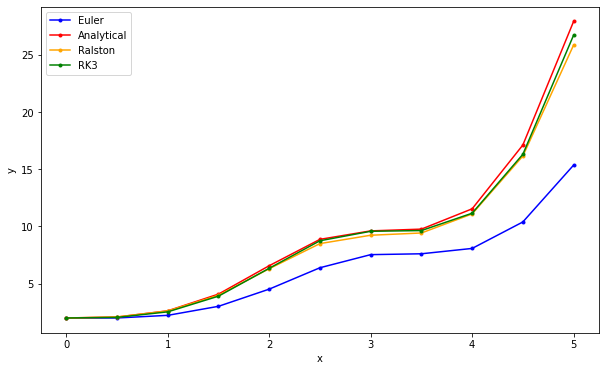

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(Xn, result_euler, "b", marker = ".")
plt.plot(Xn, y_real, "r", marker = ".")
plt.plot(Xn, result_ralston, "orange", marker = ".")
plt.plot(Xn, result_RK3, "g", marker = ".")
plt.legend(["Euler", "Analytical", "Ralston", "RK3"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

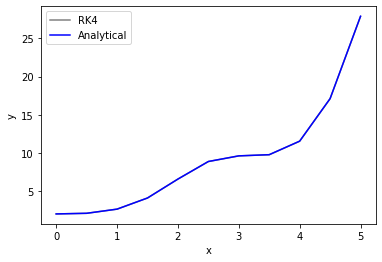

In [ ]:
plt.plot(Xn, result_RK4, "gray", Xn, y_real, "b")
plt.legend(["RK4", "Analytical"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()